# Exploratory Data Analysis

To begin this project, I'm going to dig into the training data set to see what insights I can gain.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [17]:
df = pd.read_csv('data/train.csv')

target = df['Survived']
train = df.drop('Survived', axis='columns')
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Definitions
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
# Quick look at details
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ok some initial thoughts when looking at this description
* PassenegerID doesn't sound like it'll have much predictive power
* Pclass should provide some insight - Higher classes would be first on the lifeboats I'd imagine
* Age also should be useful (Woman and children first!)
* SibSp/Parch - This may have some predicive power, not sure yet...
* Fare, like PClass, should have some predictive power (If I paid a lot for my ticket, I should get on a liferaft first!)

Lets dig into these first before moving onto the non numerical variables.

#### Passeneger ID

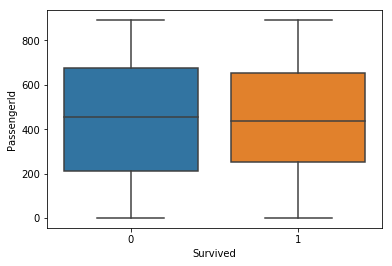

In [18]:
pass_id = pd.concat([train['PassengerId'], target] ,axis=1)
sns.boxplot(x='Survived', y='PassengerId', data=pass_id);

Clearly, a passengers ID was randomly assigned as the spread of numbers is almost exactly equal for passengers who died and for those who survived.

#### Age

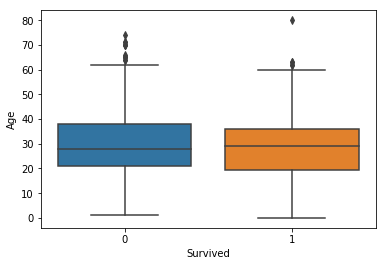

In [31]:
age = pd.concat([train['Age'], target] ,axis=1)
sns.boxplot(x='Survived', y='Age', data=age);

C:\Users\andrew.f.mcsweeney\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


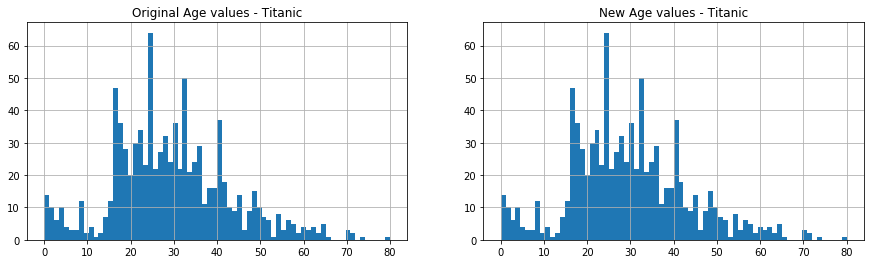

In [29]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = train["Age"].mean()
std_age_titanic       = train["Age"].std()
count_nan_age_titanic = train["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

# plot original Age values
# NOTE: drop all null values, and convert to int
train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train["Age"][np.isnan(train["Age"])] = rand_1

# convert from float to int
train['Age'] = train['Age'].astype(int)

# plot new Age Values
train['Age'].hist(bins=70, ax=axis2);

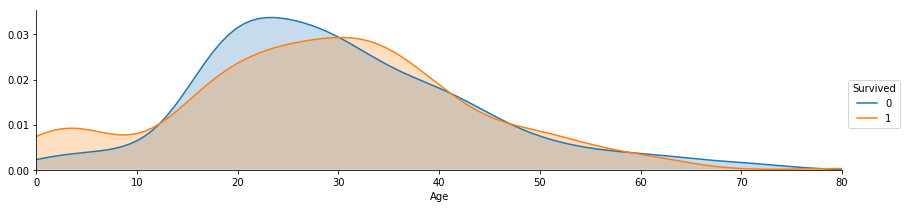

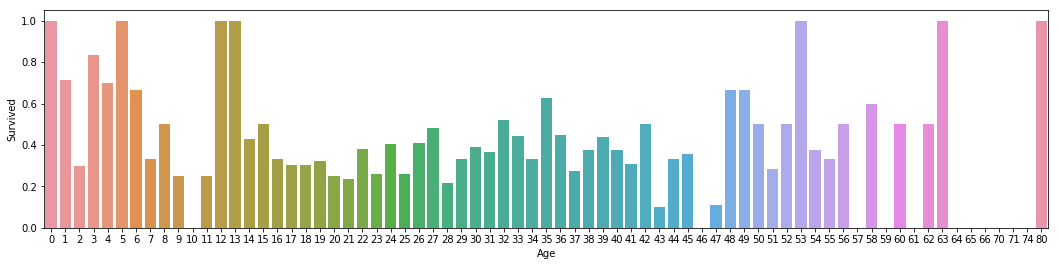

In [33]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(age, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, age['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = age[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age);